## Bayesian Statistics Project - 3A ENSAE 

#### Dating and Forecasting Turning Points by Bayesian Clustering with Dynamic Structure

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)
from statsmodels.tsa.stattools import acf # for the sample autocorrelation function 
from scipy.signal import periodogram 
from sklearn.linear_model import Lasso

import pandas as pd 
from dtw import dtw
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from tslearn.utils import to_time_series_dataset
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.signal import detrend
from tslearn.clustering import TimeSeriesKMeans

from sklearn.model_selection import GridSearchCV

In [34]:
df = pd.read_csv('dataset_treated.csv')
df = df.dropna()
dataset = to_time_series_dataset(df.drop(columns=['Date']).values)

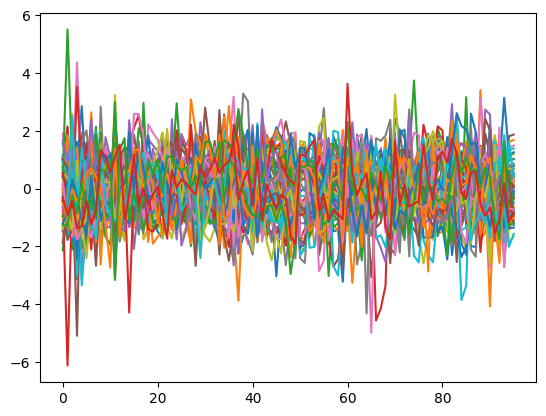

In [35]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  
dataset = scaler.fit_transform(dataset)
dataset = detrend(dataset, axis=1)


for i in range(len(dataset)):
    plt.plot(dataset[i].ravel())

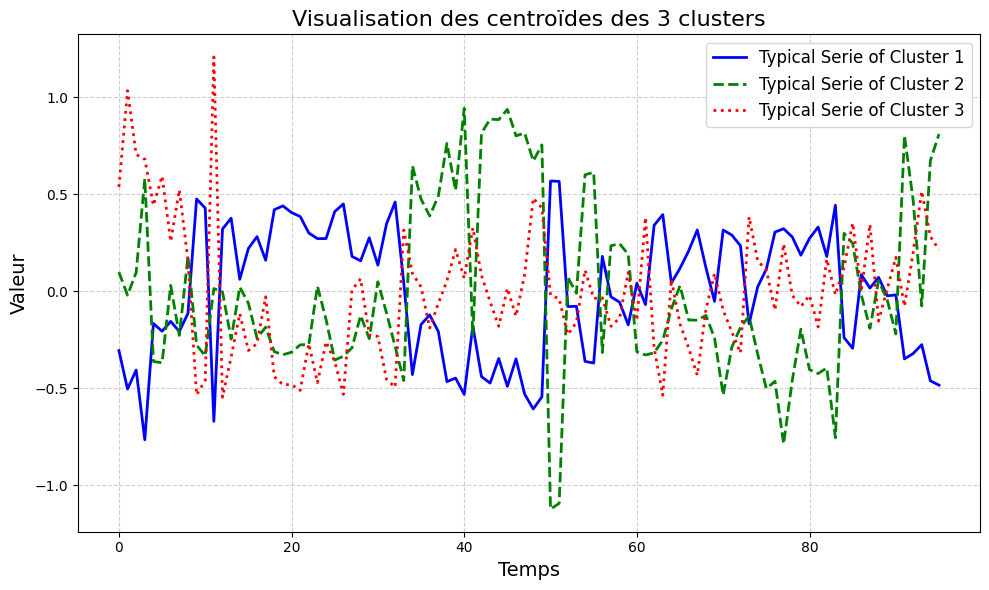

In [37]:
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=42)
labels = model.fit_predict(dataset)

typical_TS0 = np.mean(dataset[labels == 0], axis=0)
typical_TS1 = np.mean(dataset[labels == 1], axis=0)
typical_TS2 = np.mean(dataset[labels == 2], axis=0)

plt.figure(figsize=(10, 6))  
plt.plot(typical_TS0.ravel(), label="Typical Serie of Cluster 1", color="blue", linestyle="-", linewidth=2)
plt.plot(typical_TS1.ravel(), label="Typical Serie of Cluster 2", color="green", linestyle="--", linewidth=2)
plt.plot(typical_TS2.ravel(), label="Typical Serie of Cluster 3", color="red", linestyle=":", linewidth=2)

plt.title("Visualisation des centroïdes des 3 clusters", fontsize=16)
plt.xlabel("Temps", fontsize=14)
plt.ylabel("Valeur", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
